# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
ts = pd.read_csv('zillow_data.csv')
ts.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [2]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [3]:

#out of top 50 sizerank:
    #find top 5 ROI ((value today / value original) - 1 zip codes
    #forecast 10 year investment horizon for each zipcode
    #refine model
    #forecast again
    #choose best zipcode to invest


In [4]:
top_50_size = ts.iloc[:50]
top_50_size

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [5]:
top_50_size['ROI'] = (top_50_size['2018-04'] / top_50_size['1996-04']) - 1
top_50_size.head()

<ipython-input-5-2b1340729555>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_size['ROI'] = (top_50_size['2018-04'] / top_50_size['1996-04']) - 1


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.365295
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.567966
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,0.571798


In [6]:
top_50_size['ROI'].nlargest(n=10)

29    6.330859
33    5.030201
10    4.945679
30    4.774809
47    4.195133
9     3.978460
46    3.323709
12    3.297147
13    3.284514
15    3.040656
Name: ROI, dtype: float64

In [7]:
top5 = top_50_size.iloc[[29, 33, 10, 30, 47]]
top5

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,668000,672200,673100,674600,678200,680900,683000,687500,691300,6.330859
33,66133,20009,Washington,DC,Washington,District of Columbia,34,178800.0,179200.0,179600.0,...,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200,5.030201
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,4.945679
30,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,...,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900,4.774809
47,62040,11230,New York,NY,New York,Kings,48,230100.0,230800.0,231500.0,...,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400,4.195133


# Step 3: EDA and Visualization

In [8]:
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [9]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [10]:
melted_ts = melt_data(top5)

<AxesSubplot:xlabel='time'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


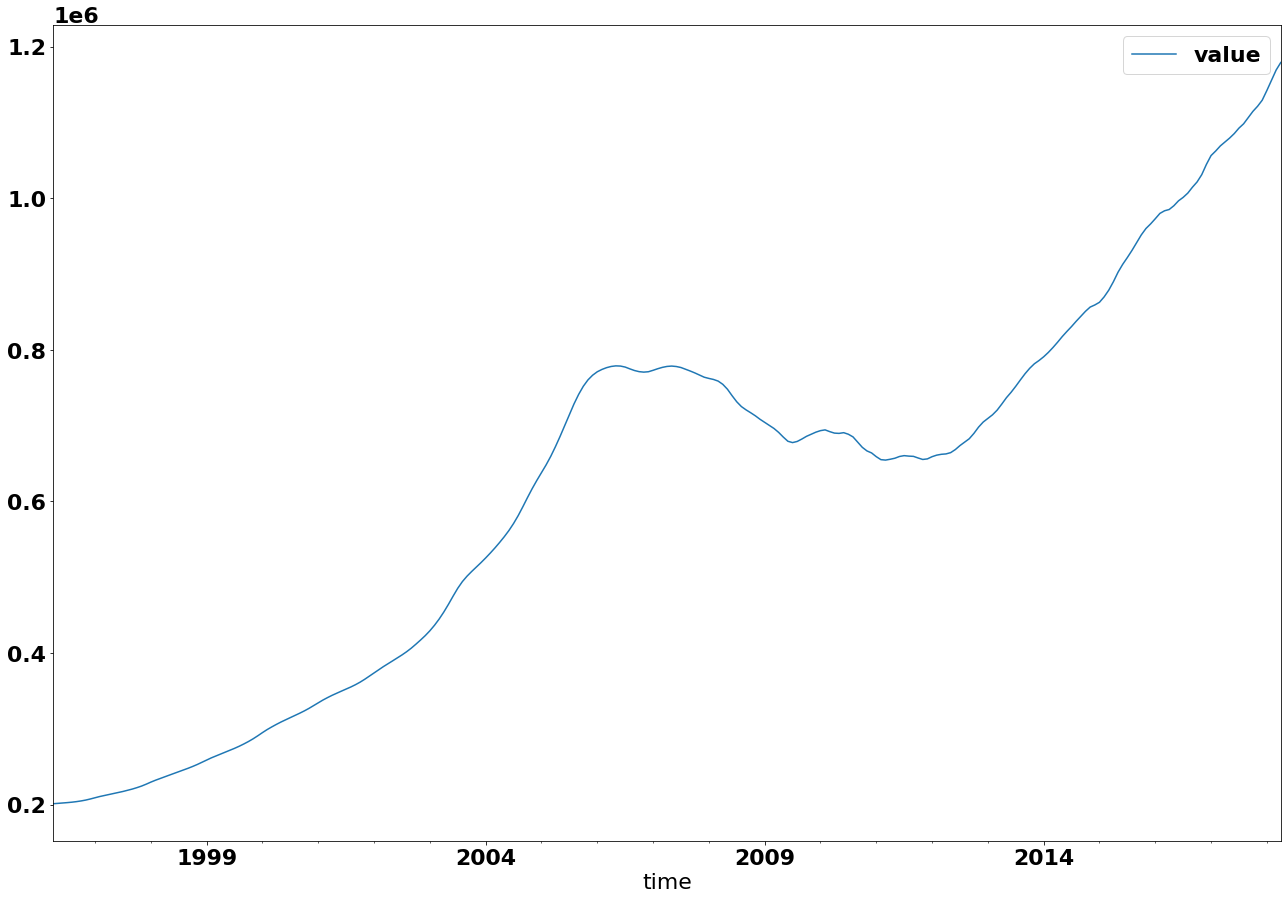

In [11]:
melted_ts.plot(figsize=(22,15))

positive trend, with cyclical movement corresponding to the business cycle of recession (i.e. post 2008 lows) and growth.

In [12]:
region1 = top5.iloc[[0]]
region2 = top5.iloc[[1]]
region3 = top5.iloc[[2]]
region4 = top5.iloc[[3]]
region5 = top5.iloc[[4]]

<AxesSubplot:xlabel='time'>

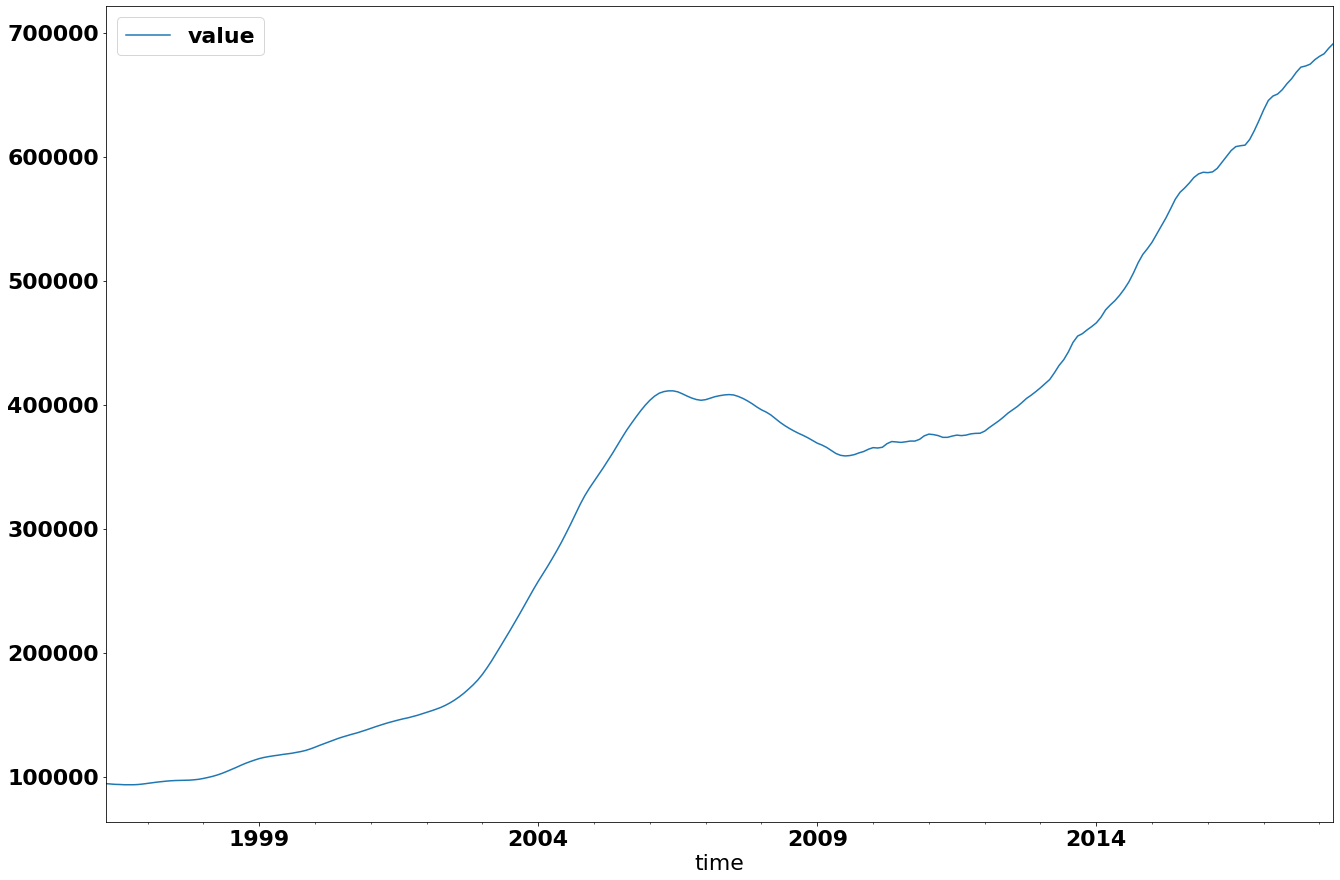

In [13]:
melted_r1 = melt_data(region1)
melted_r1.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

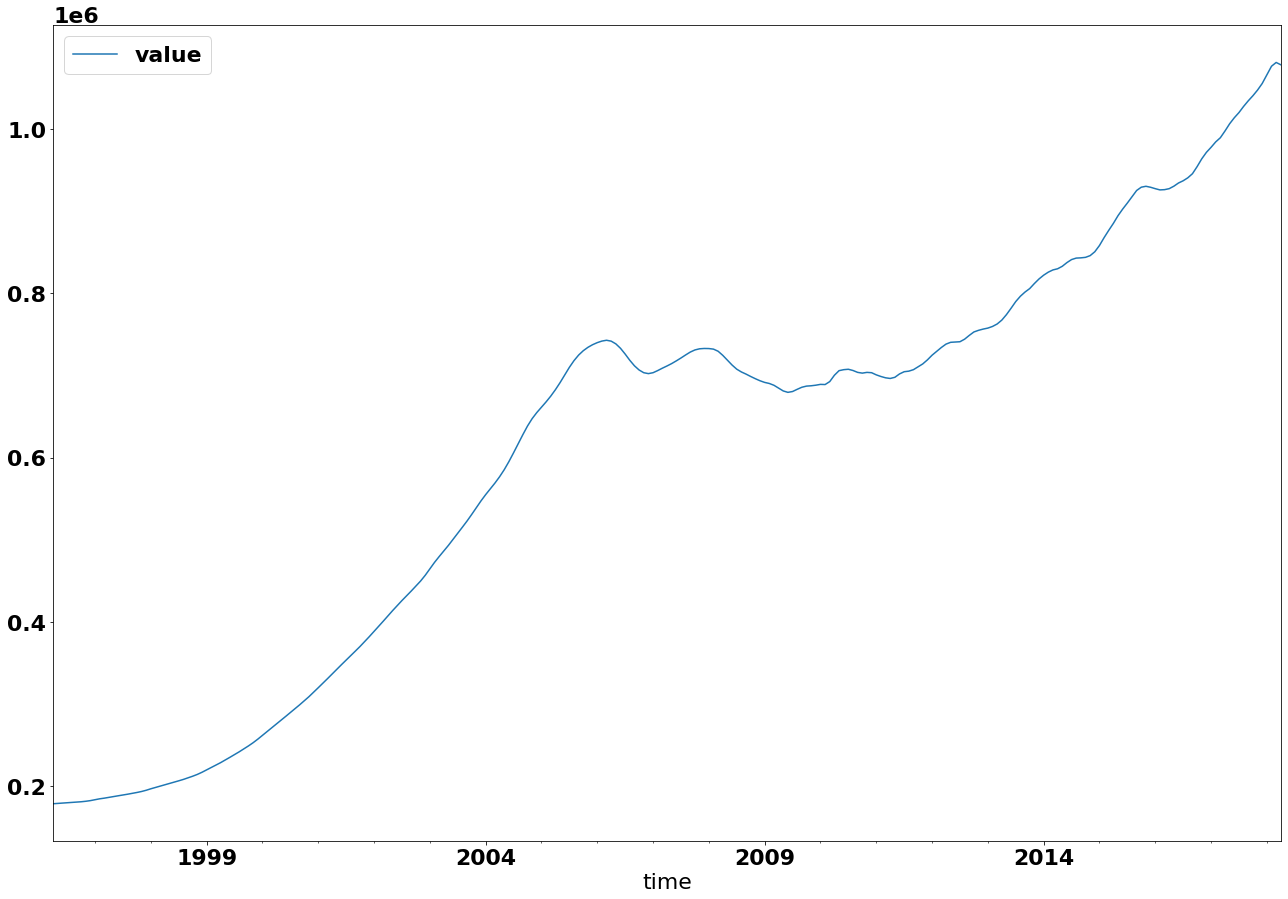

In [14]:
melted_r2 = melt_data(region2)
melted_r2.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

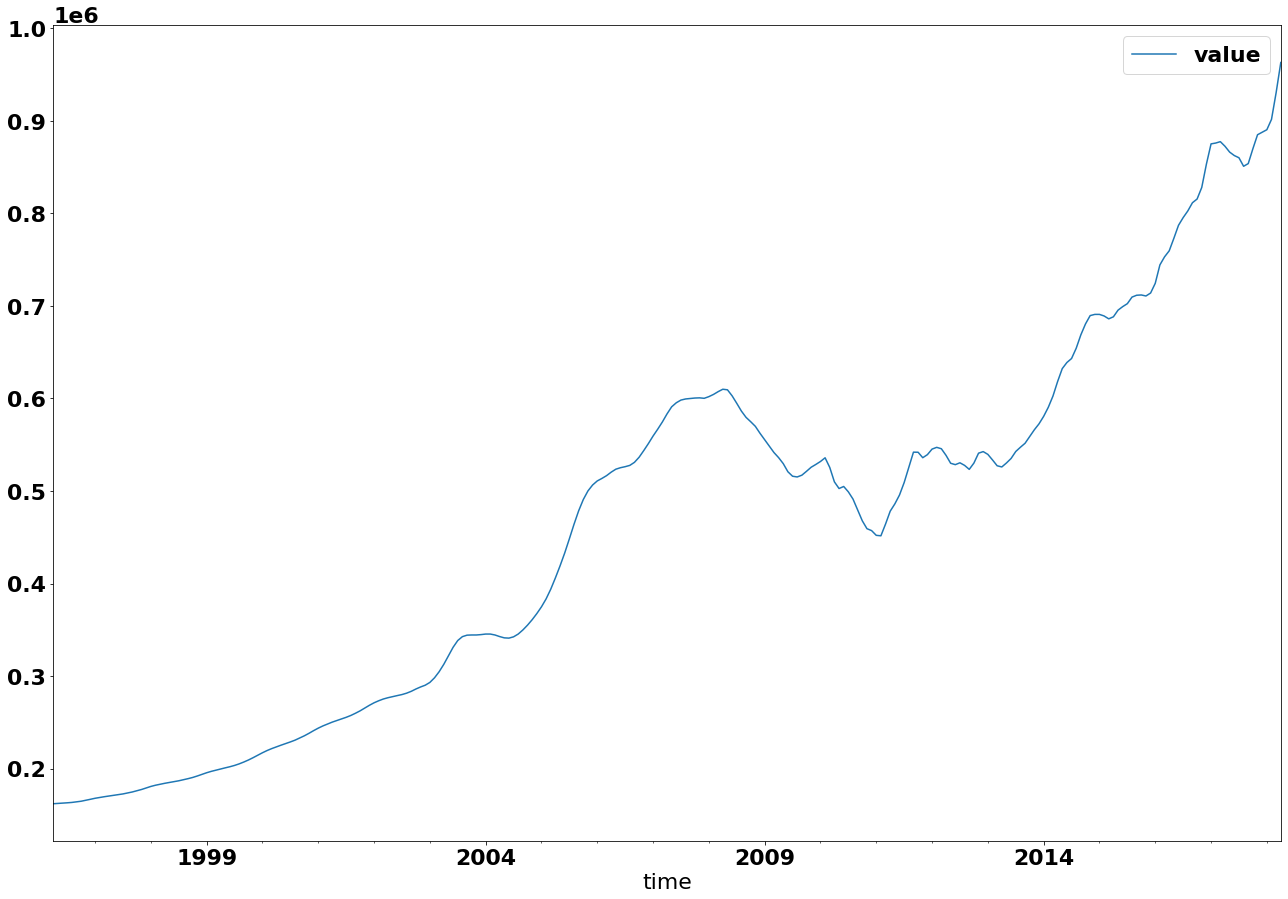

In [15]:
melted_r3 = melt_data(region3)
melted_r3.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

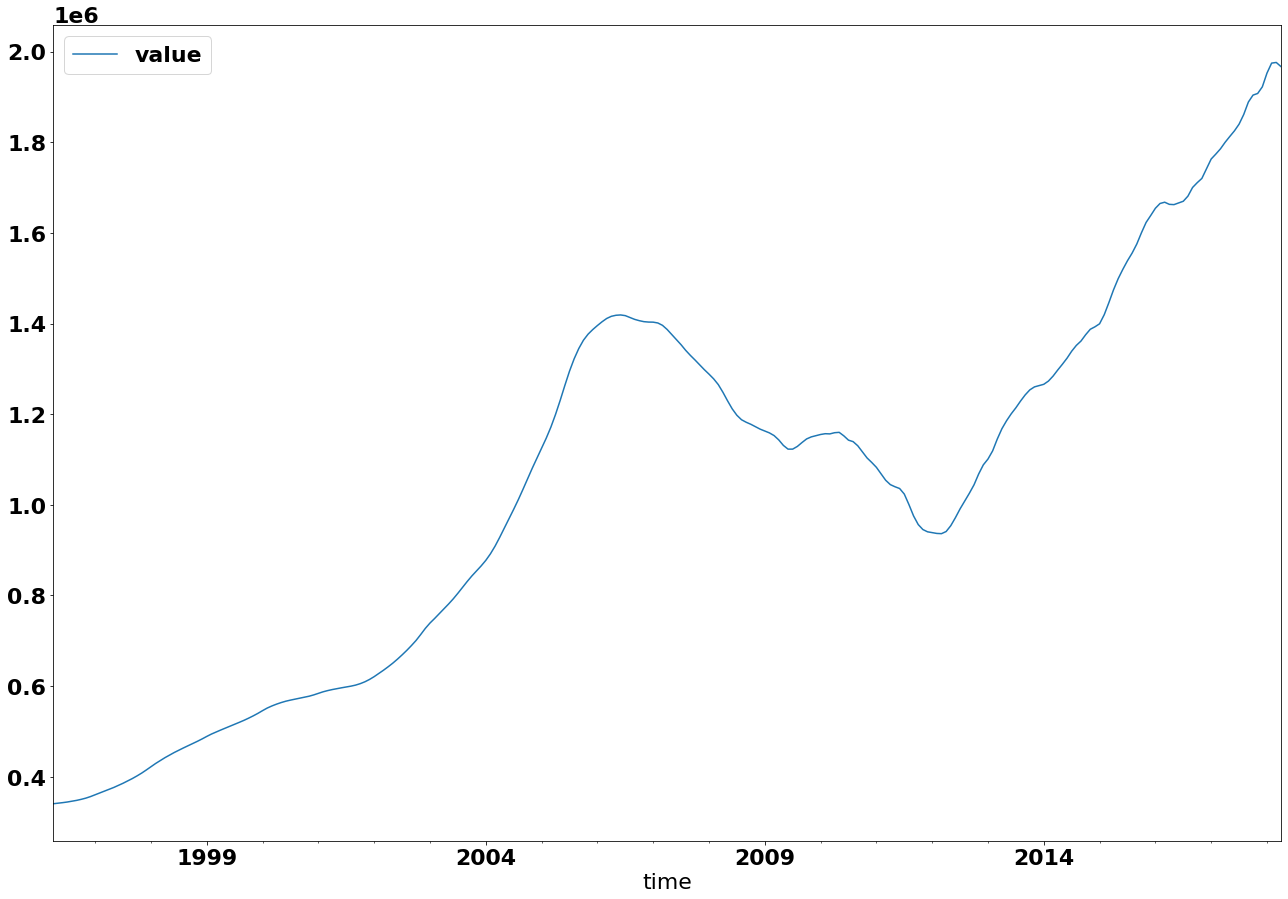

In [16]:
melted_r4 = melt_data(region4)
melted_r4.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

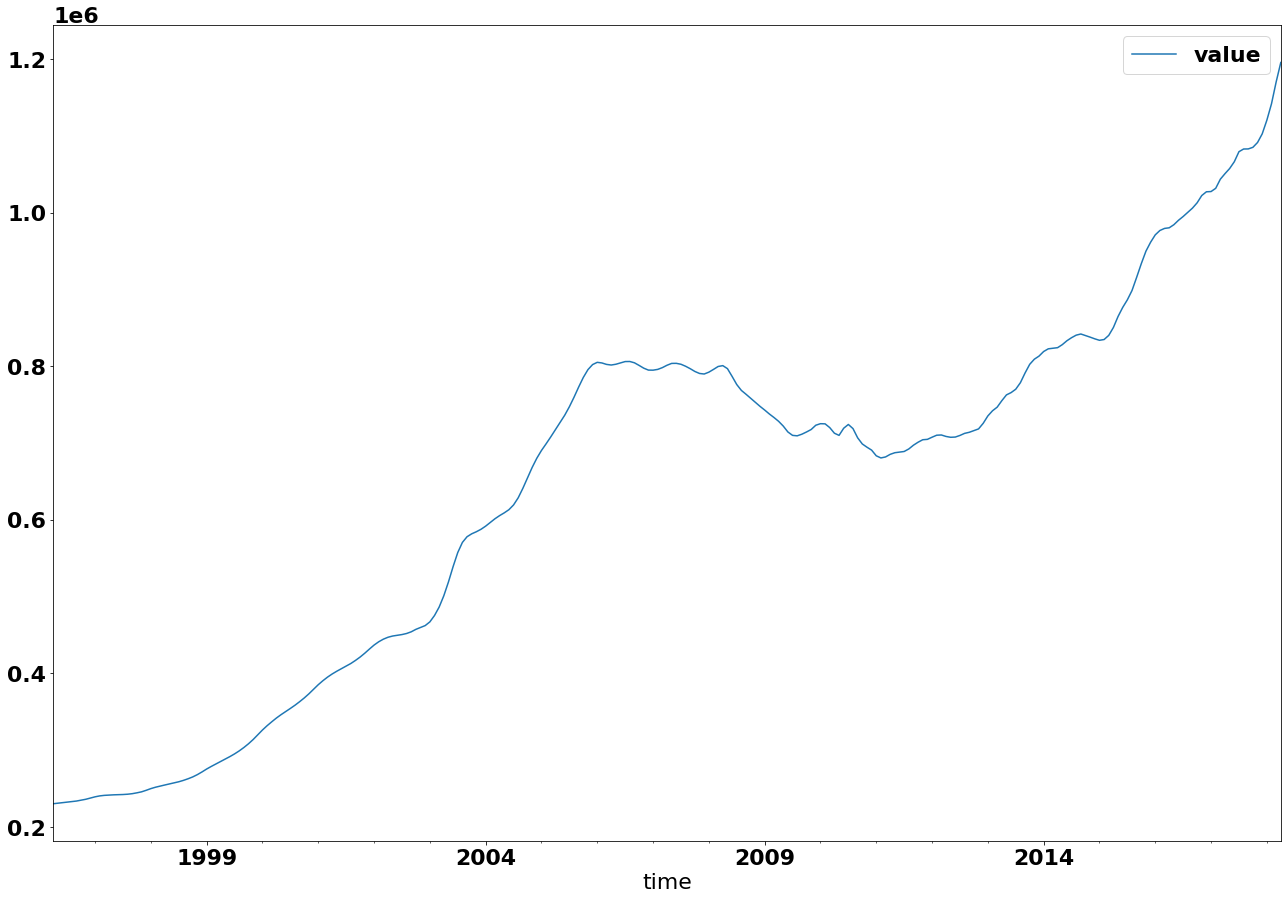

In [17]:
melted_r5 = melt_data(region5)
melted_r5.plot(figsize=(22,15))

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


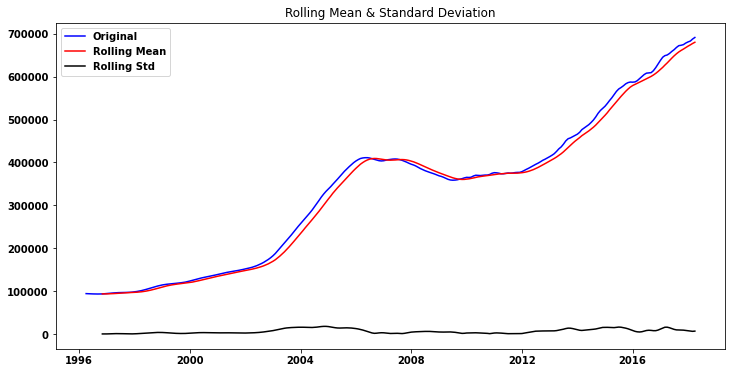

Results of Dickey-Fuller Test: 

Test Statistic                  -0.546137
p-value                          0.882694
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [19]:
stationarity_check(melted_r1)

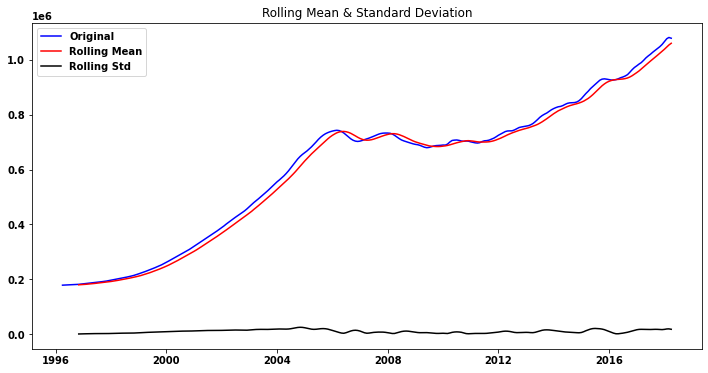

Results of Dickey-Fuller Test: 

Test Statistic                  -1.118915
p-value                          0.707470
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [20]:
stationarity_check(melted_r2)

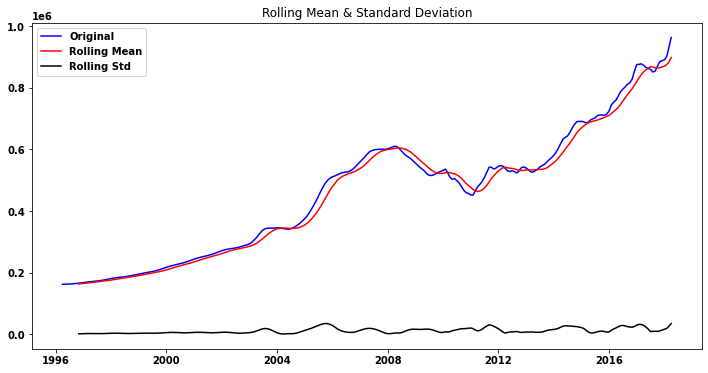

Results of Dickey-Fuller Test: 

Test Statistic                   0.625410
p-value                          0.988225
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [21]:
stationarity_check(melted_r3)

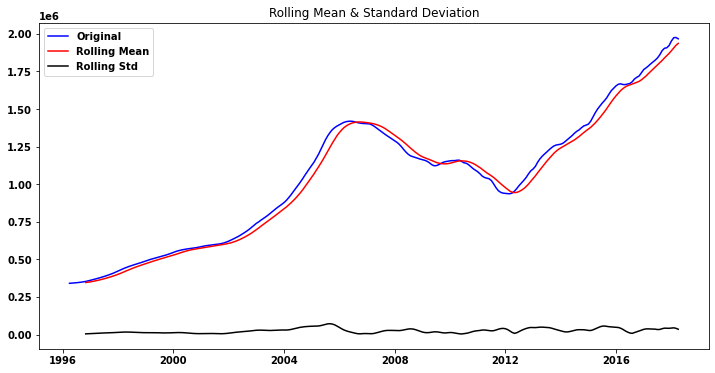

Results of Dickey-Fuller Test: 

Test Statistic                  -0.975326
p-value                          0.762157
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [22]:
stationarity_check(melted_r4)

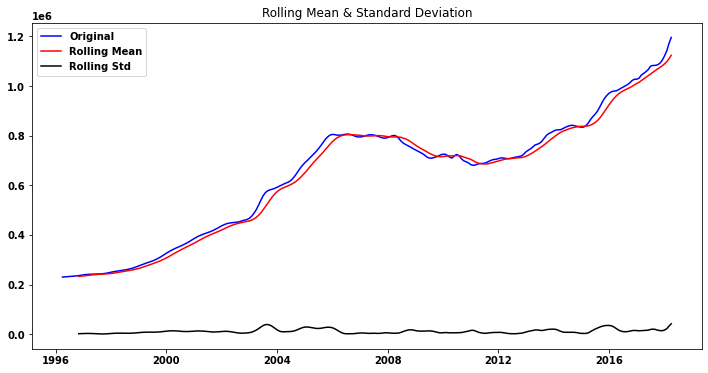

Results of Dickey-Fuller Test: 

Test Statistic                   0.223604
p-value                          0.973555
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [23]:
stationarity_check(melted_r5)

Each series fails to reject Dickey-Fuller test. All non-stationary. Requires time series decomposition.

In [24]:
#forecast across top5 zipcodes for 10 years. ARIMA modelling will allow us to address
#stationarity problem

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
decomposition_r1 = seasonal_decompose(melted_r1)

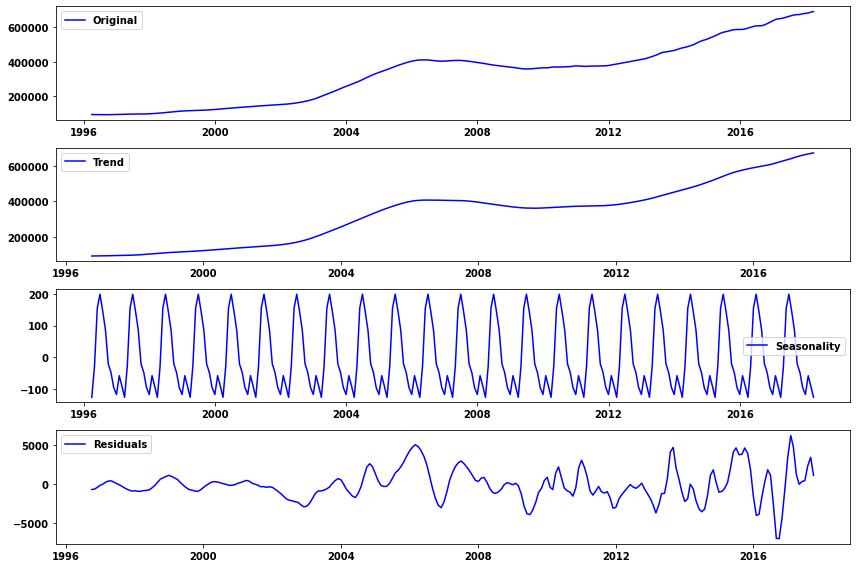

In [27]:
trend_r1 = decomposition_r1.trend
seasonal_r1 = decomposition_r1.seasonal
residual_r1 = decomposition_r1.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r1, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r1, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r1,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r1, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

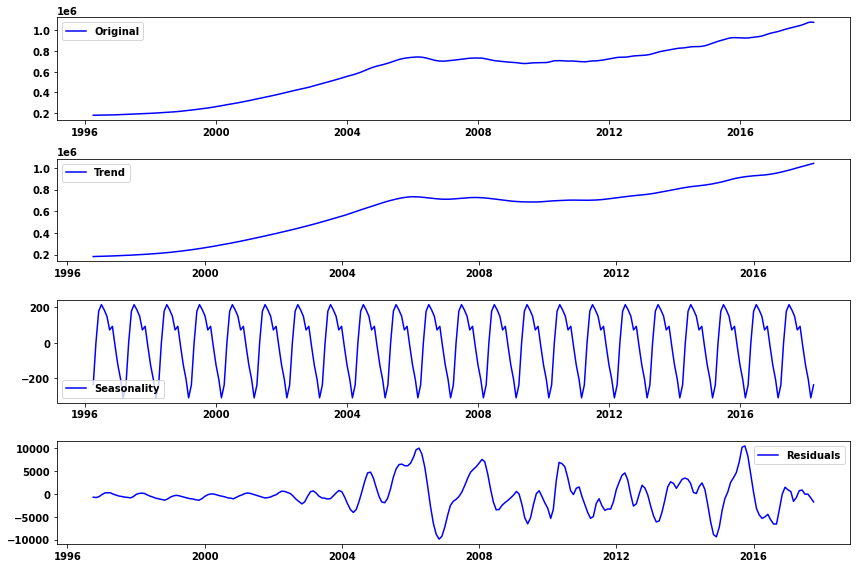

In [28]:
decomposition_r2 = seasonal_decompose(melted_r2)

trend_r2 = decomposition_r2.trend
seasonal_r2 = decomposition_r2.seasonal
residual_r2 = decomposition_r2.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r2, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r2, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r2,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r2, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

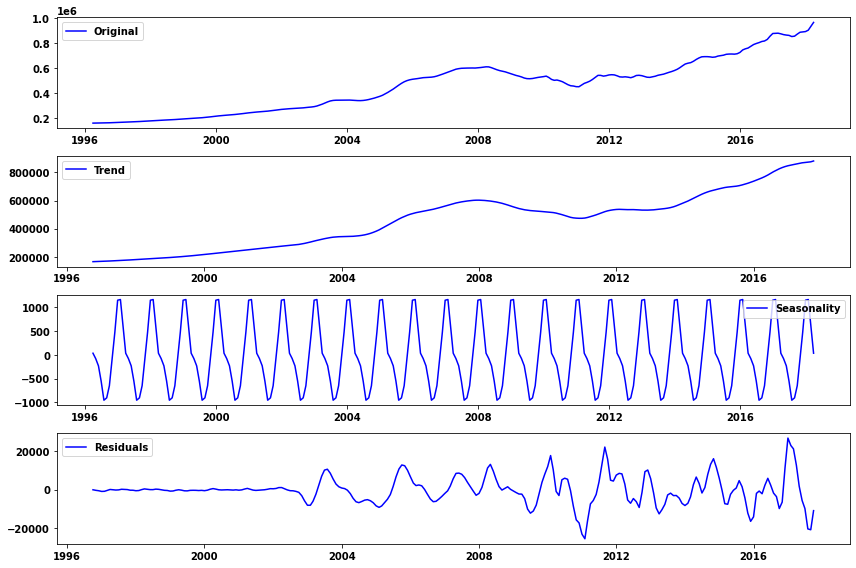

In [29]:
decomposition_r3 = seasonal_decompose(melted_r3)

trend_r3 = decomposition_r3.trend
seasonal_r3 = decomposition_r3.seasonal
residual_r3 = decomposition_r3.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r3, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r3, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r3,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r3, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

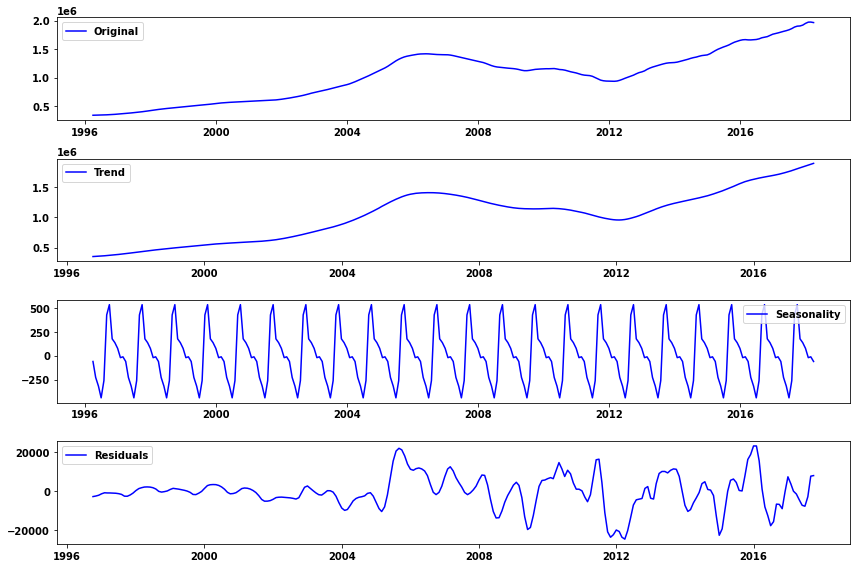

In [30]:
decomposition_r4 = seasonal_decompose(melted_r4)

trend_r4 = decomposition_r4.trend
seasonal_r4 = decomposition_r4.seasonal
residual_r4 = decomposition_r4.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r4, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r4, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r4,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r4, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

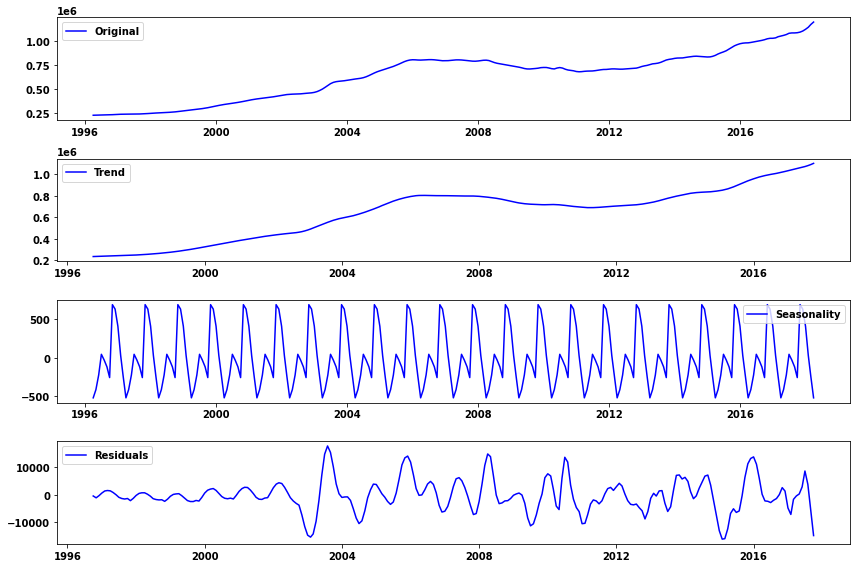

In [31]:
decomposition_r5 = seasonal_decompose(melted_r5)

trend_r5 = decomposition_r5.trend
seasonal_r5 = decomposition_r5.seasonal
residual_r5 = decomposition_r5.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r5, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r5, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r5,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r5, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [32]:
#r1 detrending
r1_diff = melted_r1.diff(periods=12).dropna()
r1_diff.head()

,value
time,
1997-04-01,1600.0
1997-05-01,2300.0
1997-06-01,2900.0
1997-07-01,3200.0
1997-08-01,3500.0


<AxesSubplot:xlabel='time'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


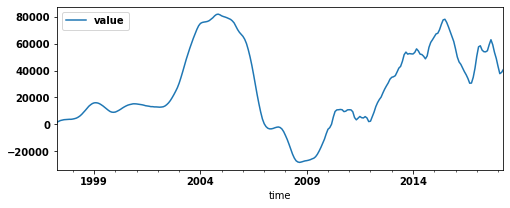

In [33]:
r1_diff.plot(figsize=(8,3))

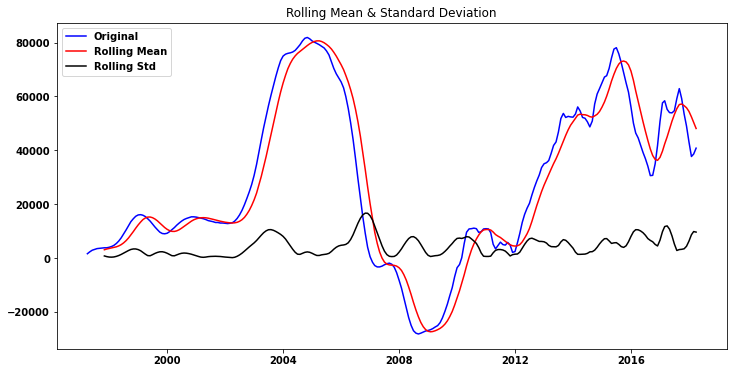

Results of Dickey-Fuller Test: 

Test Statistic                  -2.682160
p-value                          0.077177
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [34]:
stationarity_check(r1_diff)

In [35]:
r1_rollmean = melted_r1.rolling(window=12).mean()
r1_minusroll = melted_r1 - r1_rollmean
r1_minusroll.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,NaN
1996-07-01,NaN
1996-08-01,NaN
1996-09-01,NaN
1996-10-01,NaN
1996-11-01,NaN
1996-12-01,NaN


<AxesSubplot:xlabel='time'>

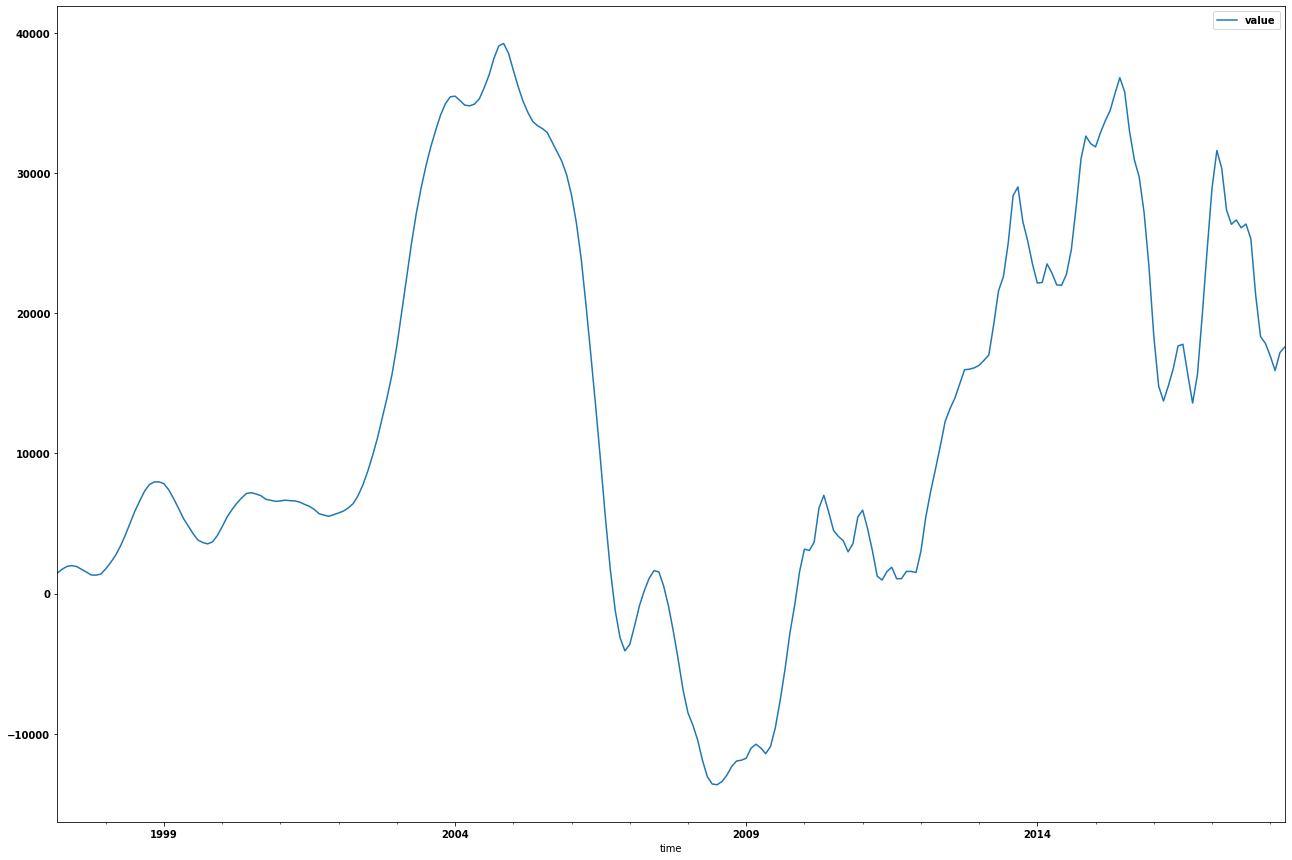

In [36]:
r1_minusroll.dropna(inplace=True)
r1_minusroll.plot(figsize=(22,15))

In [37]:
r1_roll_diff = r1_minusroll.diff(periods=1)
r1_roll_diff.dropna(inplace=True)
r1_roll_diff.head()

,value
time,
1997-04-01,266.666667
1997-05-01,208.333333
1997-06-01,58.333333
1997-07-01,-66.666667
1997-08-01,-191.666667


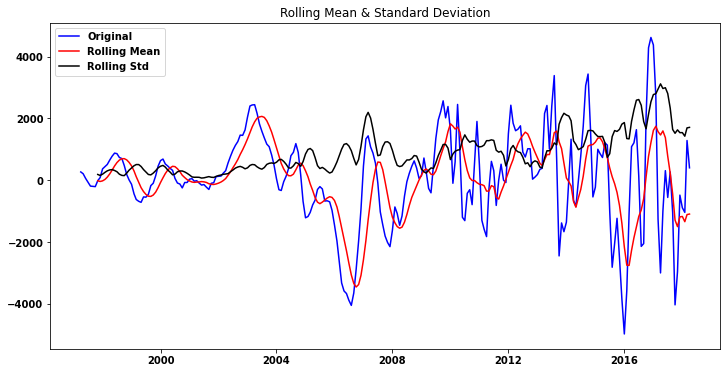

Results of Dickey-Fuller Test: 

Test Statistic                  -2.441433
p-value                          0.130382
#Lags Used                      16.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [38]:
stationarity_check(r1_roll_diff)

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

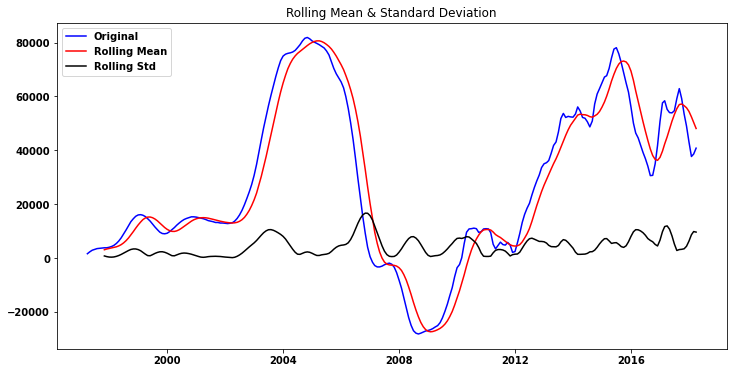

Results of Dickey-Fuller Test: 

Test Statistic                  -2.682160
p-value                          0.077177
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [40]:
stationarity_check(r1_diff)

In [41]:
#r2 preprocessing

r2_roll = melted_r2.rolling(window=12).mean()
r2_minusroll = melted_r2 - r2_roll
r2_minusroll.dropna(inplace=True)



In [42]:
r2_roll_diff = r2_minusroll.diff(periods=1)
r2_roll_diff.dropna(inplace=True)
r2_roll_diff.head()


,value
time,
1997-04-01,350.000000
1997-05-01,208.333333
1997-06-01,258.333333
1997-07-01,116.666667
1997-08-01,158.333333


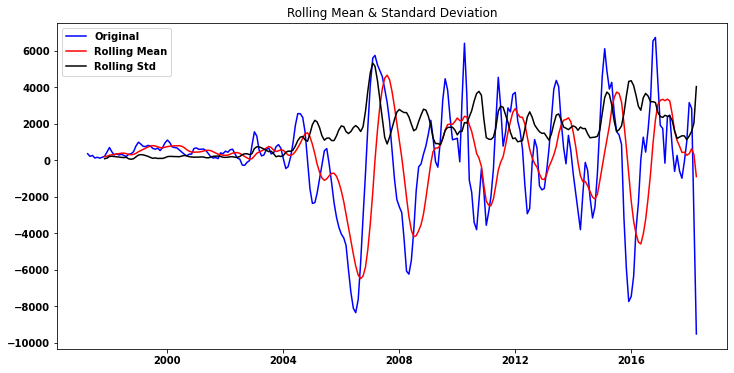

Results of Dickey-Fuller Test: 

Test Statistic                  -4.703672
p-value                          0.000083
#Lags Used                      13.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [43]:
stationarity_check(r2_roll_diff)

In [44]:
#r3 de-trending
r3_roll = melted_r3.rolling(window=12).mean()
r3_minusroll = melted_r3 - r3_roll
r3_minusroll.dropna(inplace=True)


In [45]:
r3_roll_diff = r3_minusroll.diff(periods=1)
r3_roll_diff.dropna(inplace=True)
r3_roll_diff.head()


,value
time,
1997-04-01,100.000000
1997-05-01,-33.333333
1997-06-01,-66.666667
1997-07-01,0.000000
1997-08-01,150.000000


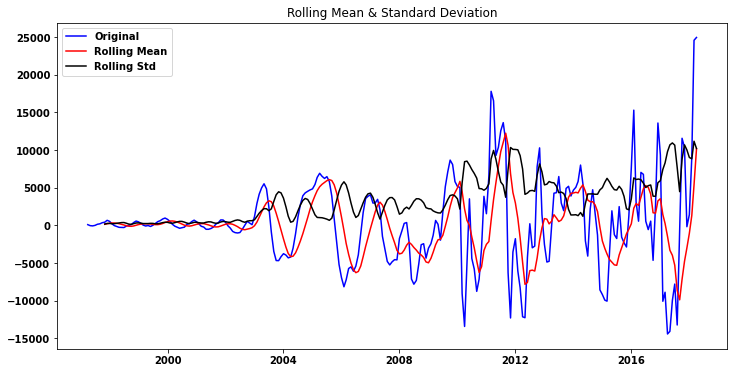

Results of Dickey-Fuller Test: 

Test Statistic                  -5.073185
p-value                          0.000016
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [46]:
stationarity_check(r3_roll_diff)

In [47]:
#r4 de-trend
r4_roll = melted_r4.rolling(window=12).mean()
r4_minusroll = melted_r4 - r4_roll
r4_minusroll.dropna(inplace=True)

In [48]:
r4_roll_diff = r4_minusroll.diff(periods=1)
r4_roll_diff.dropna(inplace=True)
r4_roll_diff.head()


,value
time,
1997-04-01,1458.333333
1997-05-01,1300.000000
1997-06-01,1425.000000
1997-07-01,1250.000000
1997-08-01,1366.666667


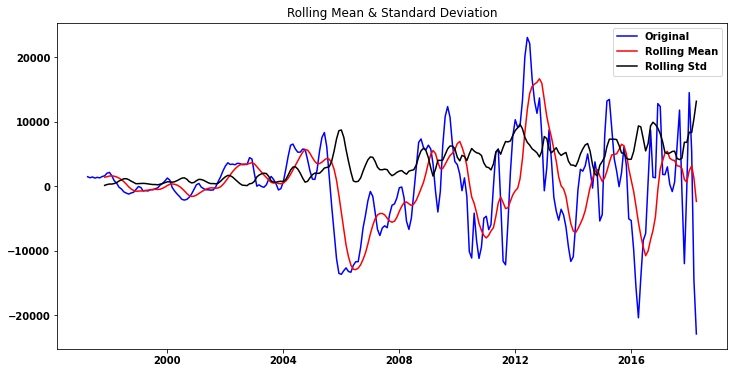

Results of Dickey-Fuller Test: 

Test Statistic                  -4.541595
p-value                          0.000165
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [49]:
stationarity_check(r4_roll_diff)

In [50]:
#r5 de-trend
r5_roll = melted_r5.rolling(window=12).mean()
r5_minusroll = melted_r5 - r5_roll
r5_minusroll.dropna(inplace=True)

In [51]:
r5_roll_diff = r5_minusroll.diff(periods=1)
r5_roll_diff.dropna(inplace=True)
r5_roll_diff.head()


,value
time,
1997-04-01,-541.666667
1997-05-01,-608.333333
1997-06-01,-666.666667
1997-07-01,-633.333333
1997-08-01,-408.333333


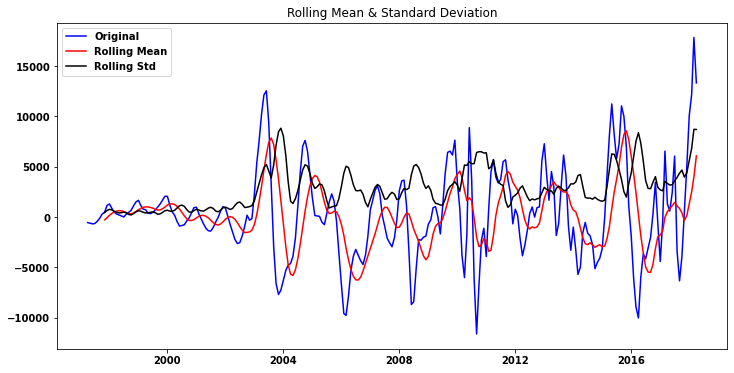

Results of Dickey-Fuller Test: 

Test Statistic                -6.215821e+00
p-value                        5.369198e-08
#Lags Used                     8.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


In [52]:
stationarity_check(r5_roll_diff)

# Step 5: ARIMA Modeling

In [53]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

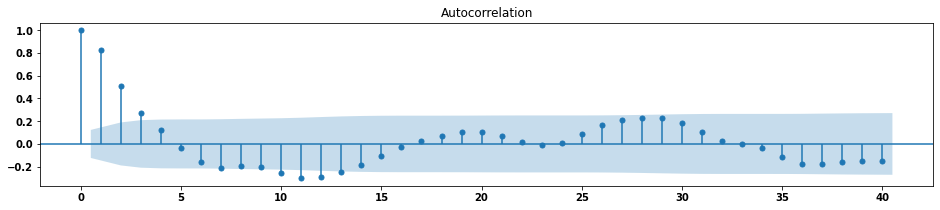

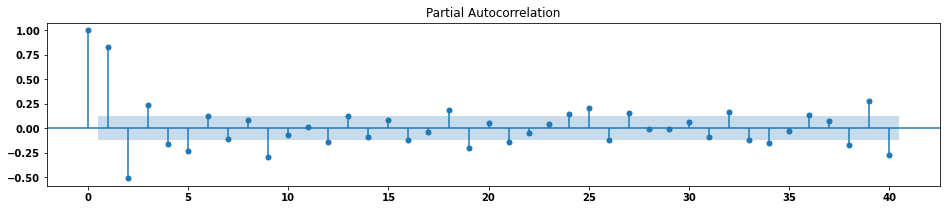

In [54]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(r5_roll_diff, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(r5_roll_diff, ax=ax, lags=40);

Both ACF and PACF tail off, indicating an ARMA model with both AR and MA parameters is best:

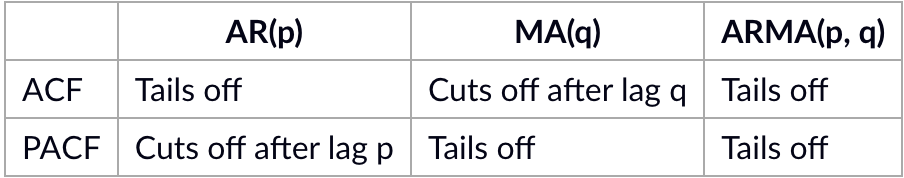

In [55]:
#r5_arma = ARMA(r5_roll_diff, order=)
#r5_arma.fit()

In [56]:
from pmdarima.arima import auto_arima

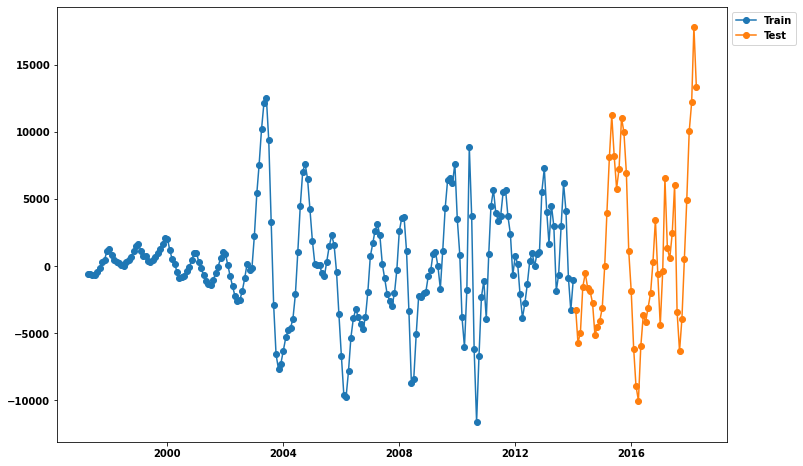

In [57]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(r5_roll_diff)* train_size)
split_idx

# Split
r5_train = r5_roll_diff.iloc[:split_idx]
r5_test = r5_roll_diff.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r5_train, label='Train', **kws)
plt.plot(r5_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [58]:
r5_autoarima = auto_arima(r5_train, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3906.851, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3666.381, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3707.130, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3905.235, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3674.565, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3659.408, Time=0.52 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=3636.487, Time=2.73 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=3625.496, Time=2.44 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(1,0,0)(3,0,2)[12] intercept   : AIC=3625.085, Time=2.78 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=3627.569, Time=1.28 sec
 ARIMA(1,0,0)(3,0,3)[12] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(1,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(2,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(1,0,1)(3,0,2)[12] intercept   : AIC=3556.632, Time=2.99 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=3559.104, Time=1.44 sec
 ARIMA(1,0,1)(3,0,1)[12] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(1,0,1)(3,0,3)[12] intercept   : AIC=3565.704, Time=3.40 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(1,0,1)(2,0,3)[12] inter

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(3,0,0)[12] intercept   : AIC=3561.775, Time=0.65 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=3576.596, Time=0.30 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(3,0,1)(3,0,1)[12] intercept   : AIC=3544.567, Time=3.55 sec
 ARIMA(2,0,2)(3,0,1)[12] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(1,0,2)(3,0,1)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(3,0,0)(3,0,1)[12] intercept   : AIC=3542.510, Time=3.72 sec
 ARIMA(3,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(3,0,0)(3,0,0)[12] intercept   : AIC=3558.070, Time=0.93 sec
 ARIMA(3,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=3.91 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=3572.004, Time=0.58 sec
 ARIMA(3,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(3,0,0)(3,0,1)[12]             : AIC=inf, Time=3.00 sec

Best model:  ARIMA(3,0,0)(3,0,1)[12] intercept
Total fit time: 75.900 seconds


In [59]:
r5_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  202
Model:             SARIMAX(3, 0, 0)x(3, 0, [1], 12)   Log Likelihood               -1762.255
Date:                              Tue, 09 Aug 2022   AIC                           3542.510
Time:                                      15:47:17   BIC                           3572.284
Sample:                                           0   HQIC                          3554.557
                                              - 202                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.9499     26.281     -0.379      0.705     -61.459      41.559
ar.L1          1.4563      0.057     25.622      0.000       1.345       1.568
ar.L2         -0.8989      0.093     -9.627      0.000      -1.082      -0.716
ar.L3          0.2717      0.065      4.200      0.000       0.145       0.399
ar.S.L12       0.4183      0.151      2.769      0.006       0.122       0.714
ar.S.L24      -0.1222      0.126     -0.973      0.331      -0.368       0.124
ar.S.L36      -0.1680      0.152     -1.103      0.270      -0.467       0.130
ma.S.L12      -0.8753      0.153     -5.735      0.000      -1.174      -0.576
sigma2      2.616e+06   3.28e+05      7.982      0.000    1.97e+06    3.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               118.16
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              24.45   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


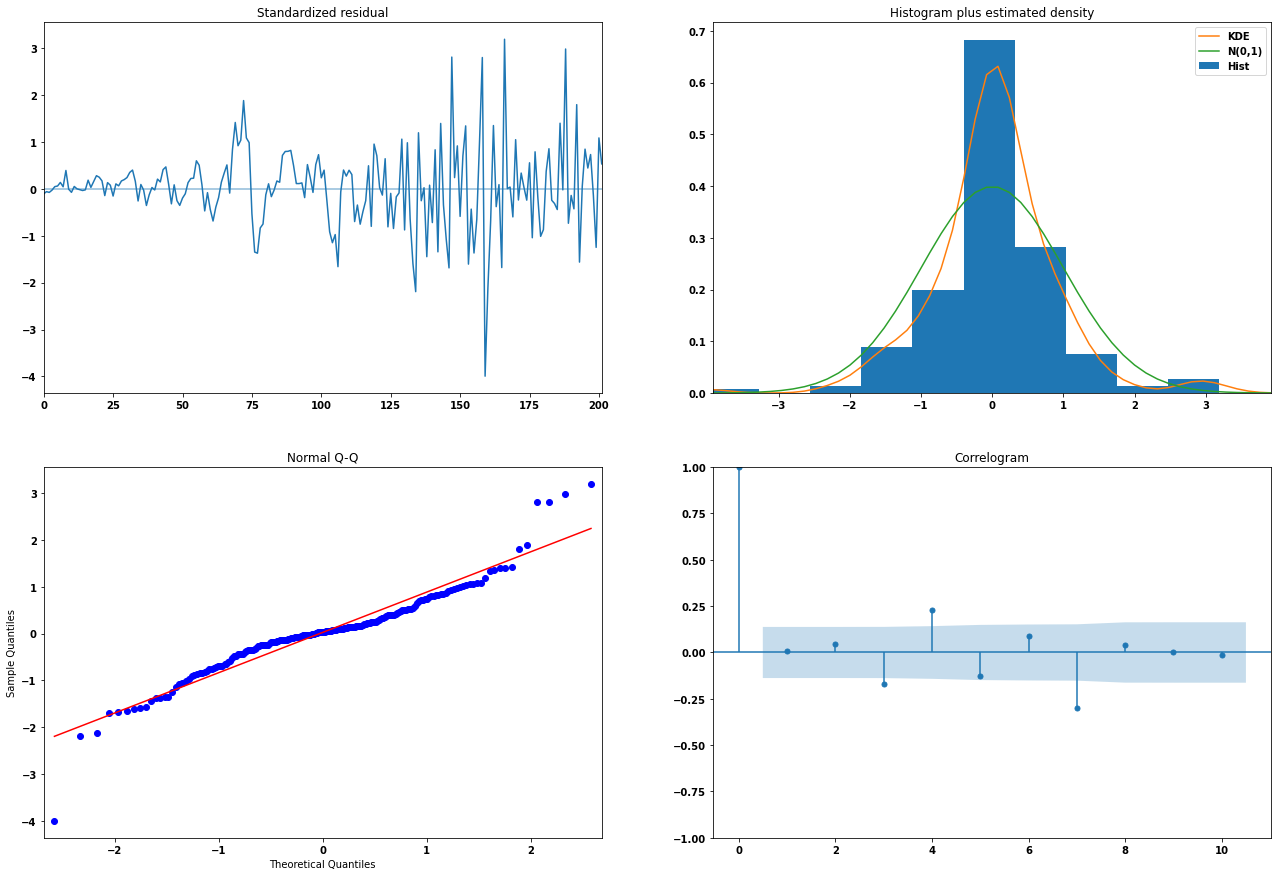

In [60]:
r5_autoarima.plot_diagnostics(figsize=(22,15))
plt.show()

In [61]:
# Forecast
#n_periods = 24
#fitted, confint = r5_autoarima.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = pd.date_range(melted_r5.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
#fitted_series = pd.Series(fitted, index=index_of_fc)
#lower_series = pd.Series(confint[:, 0], index=index_of_fc)
#upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
#plt.plot(r5_fitted)
#plt.plot(fitted_series, color='darkgreen')
#plt.fill_between(lower_series.index, 
 #                lower_series, 
  #               upper_series, 
   #              color='k', alpha=.15)
    
#plt.title("SARIMA - Final Forecast of a10 - Drug Sales")

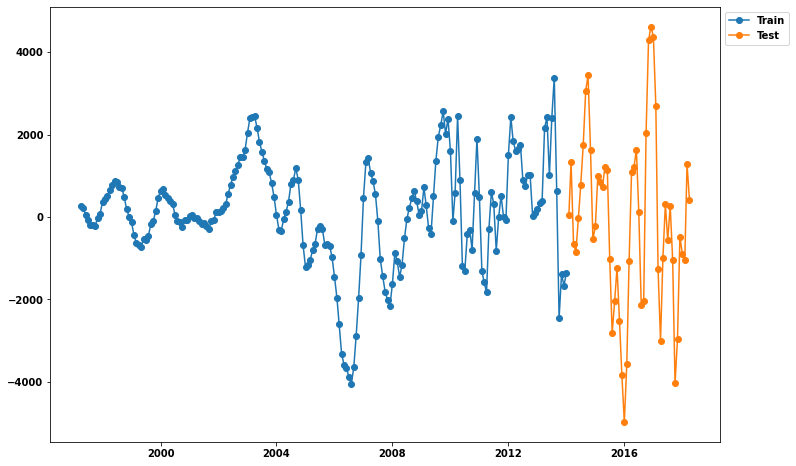

In [62]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(r1_roll_diff)* train_size)
split_idx

# Split
r1_train = r1_roll_diff.iloc[:split_idx]
r1_test = r1_roll_diff.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r1_train, label='Train', **kws)
plt.plot(r1_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [63]:
r1_autoarima = auto_arima(r1_train, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3465.416, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3173.081, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3253.788, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3464.720, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3175.735, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3150.716, Time=1.09 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=3150.731, Time=1.89 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=3138.693, Time=0.96 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=3094.668, Time=1.12 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=3101.913, Time=0.56 sec
 ARIMA(1,0,1)(3,0,1)[12] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.18 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3119.265, Time=0.21 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=3088.654, Time=1.33 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=3089.973, Time=1.21 sec
 ARIMA(1,0,1)(1,0,3)[12] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3102.523, Time=0.17 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,0,3)[12] intercept   : AIC=3090.859, Time=1.30 sec
 ARIMA(1,0,1)(2,0,3)[12] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=3090.444, Time=1.36 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=3090.120, Time=1.60 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,2)(1,0,2)[12] intercept   : AIC=3119.130, Time=1.27 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=3115.392, Time=1.00 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=3086.124, Time=1.87 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=3086.701, Time=0.95 sec
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3090.685, Time=0.57 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(2,0,2)(1,0,3)[12] intercept   : AIC=inf, Time=3.33 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3097.218, Time=0.46 sec
 ARIMA(2,0,2)(0,0,3)[12] intercept   : AIC=3087.812, Time=2.45 sec
 ARIMA(2,0,2)(2,0,1)

In [64]:
r1_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  202
Model:             SARIMAX(3, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -1525.183
Date:                            Tue, 09 Aug 2022   AIC                           3066.367
Time:                                    15:48:43   BIC                           3092.833
Sample:                                         0   HQIC                          3077.075
                                            - 202                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1121      0.081      1.389      0.165      -0.046       0.270
ar.L2          0.1572      0.095      1.651      0.099      -0.029       0.344
ar.L3          0.4262      0.066      6.429      0.000       0.296       0.556
ma.L1          1.3700      0.066     20.859      0.000       1.241       1.499
ma.L2          0.8009      0.052     15.281      0.000       0.698       0.904
ma.S.L12      -0.4296      0.072     -5.928      0.000      -0.572      -0.288
ma.S.L24      -0.2685      0.091     -2.965      0.003      -0.446      -0.091
sigma2      2.018e+05   1.33e+04     15.123      0.000    1.76e+05    2.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                95.79
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              16.81   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

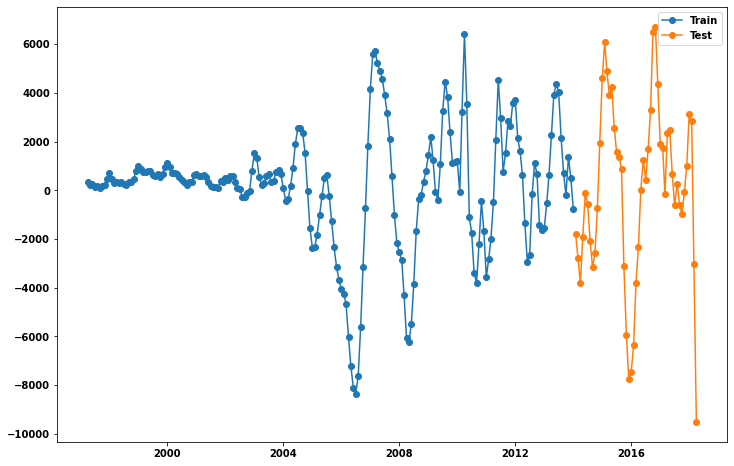

In [65]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(r2_roll_diff)* train_size)
split_idx

# Split
r2_train = r2_roll_diff.iloc[:split_idx]
r2_test = r2_roll_diff.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r2_train, label='Train', **kws)
plt.plot(r2_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [66]:
r2_autoarima = auto_arima(r2_train, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3727.252, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3361.166, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3451.580, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3725.865, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3387.471, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3356.236, Time=1.07 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=3354.503, Time=2.33 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=3690.440, Time=0.47 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=3276.120, Time=2.31 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=3275.665, Time=1.31 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=3277.109, Time=0.47 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=3269.376, Time=0.47 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=3271.118, Time=0.19 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=3299.319, Time=0.03 sec
 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=3271.693, Time=0.48 sec
 ARIMA(2,0,0)(2,0,2)[12] intercept   : AIC=3273.894, Time=1.40 sec
 ARIMA(1,0,0)(1

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(1,0,1)[12] intercept   : AIC=3236.809, Time=0.47 sec
 ARIMA(3,0,1)(0,0,2)[12] intercept   : AIC=3236.963, Time=0.74 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(1,0,0)[12] intercept   : AIC=3245.170, Time=0.41 sec
 ARIMA(3,0,1)(1,0,2)[12] intercept   : AIC=3238.637, Time=1.57 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=3235.412, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=3271.468, Time=0.11 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=3236.450, Time=0.35 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=3236.717, Time=0.56 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=3244.355, Time=0.27 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=3239.979, Time=1.41 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3243.840, Time=0.22 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3222.869, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3224.364, Time=0.69 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=3224.503, Time=1.13 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=3225.993, Time=1.74 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=3229.353, Time=0.28 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=3224.790, Time=0.69 sec
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=3224.830, Time=0.59 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,3)(0,0,1)[12] intercept   : AIC=3224.815, Time=0.34 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,3)(0,0,1)[12] intercept   : AIC=3229.310, Time=0.71 sec
 ARIMA(2,0,2)(0,0,1)[12]             : AIC=3220.934, Time=0.47 sec
 ARIMA(2,0,2)(0,0,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,2)(1,0,1)[12]             : AIC=3222.409, Time=0.60 sec
 ARIMA(2,0,2)(0,0,2)[12]             : AIC=3222.557, Time=1.01 sec
 ARIMA(2,0,2)(1,0,0)[12]             : AIC=3227.636, Time=0.39 sec
 ARIMA(2,0,2)(1,0,2)[12]             : AIC=3226.212, Time=1.70 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,1)[12]             : AIC=3227.430, Time=0.27 sec
 ARIMA(2,0,1)(0,0,1)[12]             : AIC=3233.492, Time=0.22 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,2)(0,0,1)[12]             : AIC=3222.853, Time=0.63 sec
 ARIMA(2,0,3)(0,0,1)[12]             : AIC=3222.890, Time=0.58 sec
 ARIMA(1,0,1)(0,0,1)[12]             : AIC=3241.889, Time=0.18 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,3)(0,0,1)[12]             : AIC=3222.880, Time=0.33 sec
 ARIMA(3,0,1)(0,0,1)[12]             : AIC=3233.559, Time=0.30 sec
 ARIMA(3,0,3)(0,0,1)[12]             : AIC=inf, Time=0.72 sec

Best model:  ARIMA(2,0,2)(0,0,1)[12]          
Total fit time: 42.883 seconds


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


In [67]:
r2_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  202
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 12)   Log Likelihood               -1604.467
Date:                              Tue, 09 Aug 2022   AIC                           3220.934
Time:                                      15:49:26   BIC                           3240.783
Sample:                                           0   HQIC                          3228.965
                                              - 202                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3104      0.092      3.357      0.001       0.129       0.492
ar.L2          0.3522      0.086      4.110      0.000       0.184       0.520
ma.L1          1.4809      0.068     21.627      0.000       1.347       1.615
ma.L2          0.7416      0.051     14.513      0.000       0.641       0.842
ma.S.L12      -0.4733      0.048     -9.934      0.000      -0.567      -0.380
sigma2       4.48e+05   3.38e+04     13.273      0.000    3.82e+05    5.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               147.37
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              28.05   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

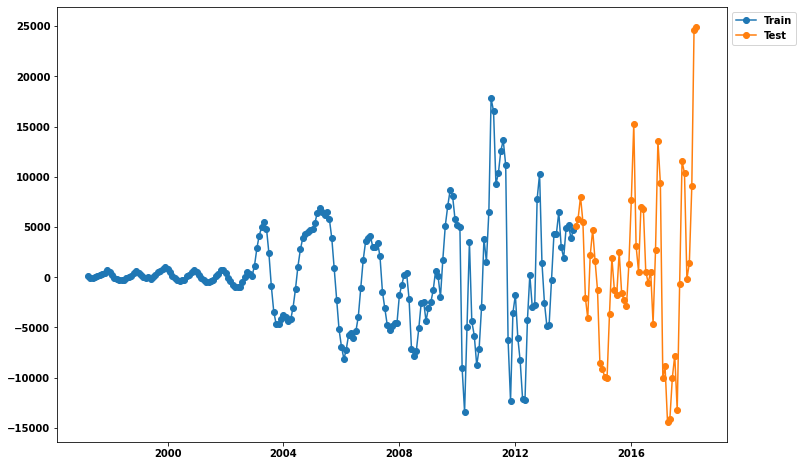

In [68]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(r3_roll_diff)* train_size)
split_idx

# Split
r3_train = r3_roll_diff.iloc[:split_idx]
r3_test = r3_roll_diff.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r3_train, label='Train', **kws)
plt.plot(r3_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [69]:
r3_autoarima = auto_arima(r3_train, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True,
                          suppress_warnings=True
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4000.594, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3773.447, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3998.769, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3793.442, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3767.065, Time=0.45 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=3764.806, Time=0.82 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=3954.569, Time=0.51 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=3729.233, Time=2.01 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=3739.122, Time=1.09 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(3,0,0)(3,0,0)[12] intercept   : AIC=3711.936, Time=2.40 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=3724.166, Time=0.67 sec
 ARIMA(3,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(3,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.40 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(3,0,0)[12] intercept   : AIC=3713.297, Time=0.99 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(3,0,0)[12] intercept   : AIC=3709.225, Time=1.75 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=3722.942, Time=0.38 sec
 ARIMA(2,0,1)(3,0,1)[12] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.32 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(3,0,0)[12] intercept   : AIC=3709.278, Time=1.37 sec
 ARIMA(2,0,2)(3,0,0)[12] intercept   : AIC=3713.163, Time=2.98 sec
 ARIMA(1,0,2)(3,0,0)[12] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(3,0,2)(3,0,0)[12] intercept   : AIC=3714.739, Time=3.64 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(3,0,0)[12]             : AIC=3707.268, Time=1.20 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,0,0)[12]             : AIC=3721.019, Time=0.26 sec
 ARIMA(2,0,1)(3,0,1)[12]             : AIC=inf, Time=2.48 sec
 ARIMA(2,0,1)(2,0,1)[12]             : AIC=inf, Time=1.05 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(3,0,0)[12]             : AIC=3707.322, Time=0.98 sec
 ARIMA(2,0,0)(3,0,0)[12]             : AIC=3727.281, Time=0.82 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(3,0,0)[12]             : AIC=3711.349, Time=0.72 sec
 ARIMA(2,0,2)(3,0,0)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(1,0,0)(3,0,0)[12]             : AIC=3762.859, Time=0.39 sec
 ARIMA(1,0,2)(3,0,0)[12]             : AIC=inf, Time=2.30 sec
 ARIMA(3,0,0)(3,0,0)[12]             : AIC=3709.981, Time=1.19 sec
 ARIMA(3,0,2)(3,0,0)[12]             : AIC=inf, Time=3.34 sec

Best model:  ARIMA(2,0,1)(3,0,0)[12]          
Total fit time: 56.074 seconds


In [70]:
r3_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  202
Model:             SARIMAX(2, 0, 1)x(3, 0, [], 12)   Log Likelihood               -1846.634
Date:                             Tue, 09 Aug 2022   AIC                           3707.268
Time:                                     15:50:22   BIC                           3730.426
Sample:                                          0   HQIC                          3716.638
                                             - 202                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7393      0.118      6.285      0.000       0.509       0.970
ar.L2         -0.1340      0.105     -1.275      0.202      -0.340       0.072
ma.L1          0.5277      0.083      6.373      0.000       0.365       0.690
ar.S.L12      -0.3860      0.045     -8.669      0.000      -0.473      -0.299
ar.S.L24      -0.2988      0.066     -4.530      0.000      -0.428      -0.170
ar.S.L36      -0.3119      0.093     -3.360      0.001      -0.494      -0.130
sigma2      4.926e+06   2.68e+05     18.391      0.000     4.4e+06    5.45e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               632.38
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):             215.31   Skew:                            -1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

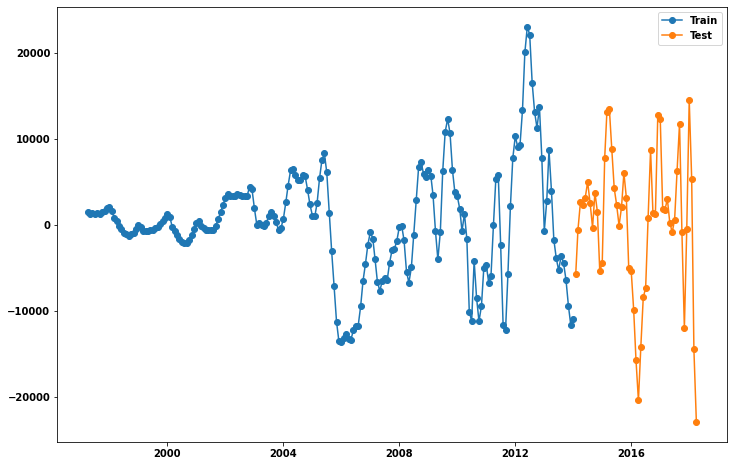

In [71]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(r4_roll_diff)* train_size)
split_idx

# Split
r4_train = r4_roll_diff.iloc[:split_idx]
r4_test = r4_roll_diff.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r4_train, label='Train', **kws)
plt.plot(r4_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [72]:
r4_autoarima = auto_arima(r4_train, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True,
                          suppress_warnings=True
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4112.966, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3747.389, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4111.134, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3745.676, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3746.919, Time=0.07 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=3743.121, Time=0.25 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.07 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3726.553, Time=0.56 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=3721.261, Time=1.00 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=3701.233, Time=2.43 sec
 ARIMA(1,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=2.65 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=3702.062, Time=1.22 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=4092.078, Time=0.67 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=3640.648, Time=2.67 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=3636.234, Time=1.16 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=3681.156, Time=0.15 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=3665.627, Time=0.69 sec
 ARIMA(2,0,0)(2,0,2)[12] intercept   : AIC=3641.947, Time=1.35 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=3680.828, Time=0.14 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=3654.530, Time=2.71 sec
 ARIMA(2,0

In [73]:
r4_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  202
Model:             SARIMAX(2, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -1811.117
Date:                              Tue, 09 Aug 2022   AIC                           3636.234
Time:                                      15:50:55   BIC                           3659.392
Sample:                                           0   HQIC                          3645.604
                                              - 202                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -60.2481     31.200     -1.931      0.053    -121.398       0.902
ar.L1          1.4263      0.045     31.606      0.000       1.338       1.515
ar.L2         -0.5264      0.041    -12.869      0.000      -0.607      -0.446
ar.S.L12       0.6521      0.075      8.750      0.000       0.506       0.798
ar.S.L24      -0.3768      0.096     -3.905      0.000      -0.566      -0.188
ma.S.L12      -0.8581      0.094     -9.095      0.000      -1.043      -0.673
sigma2      3.578e+06   3.58e+05     10.008      0.000    2.88e+06    4.28e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.80   Jarque-Bera (JB):                34.87
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              44.27   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.05e+14. Standard errors may be unstable.
"""

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


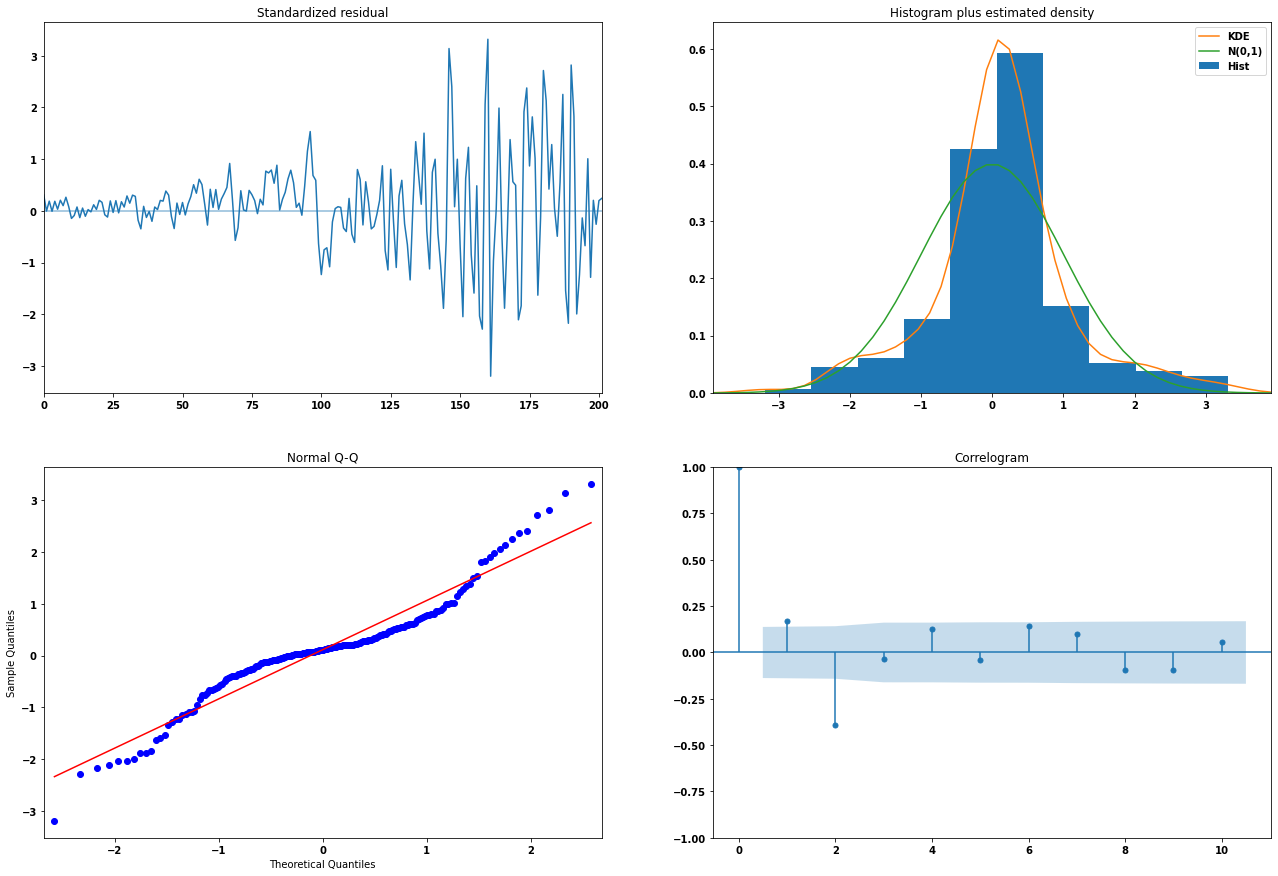

In [74]:
r4_autoarima.plot_diagnostics(figsize=(22,15))
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


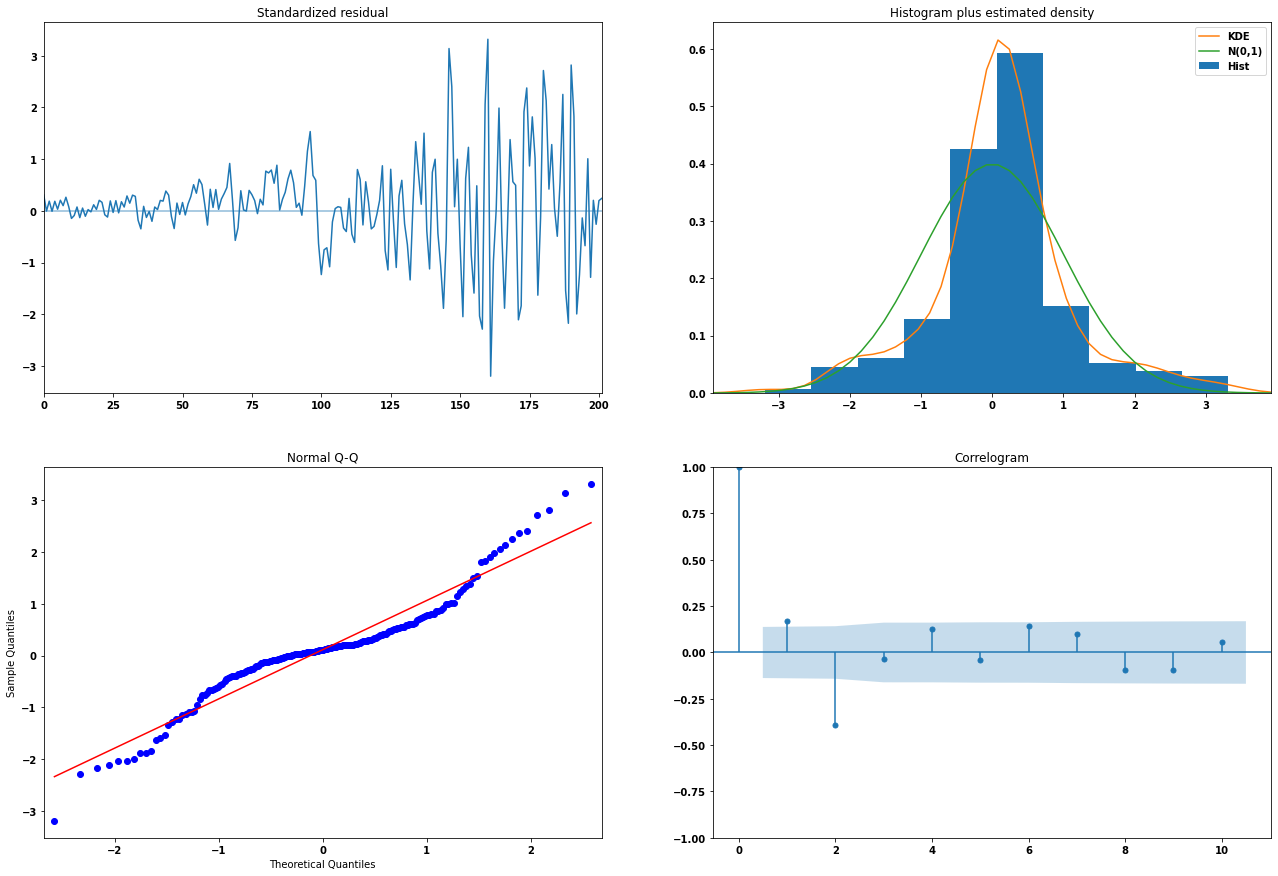

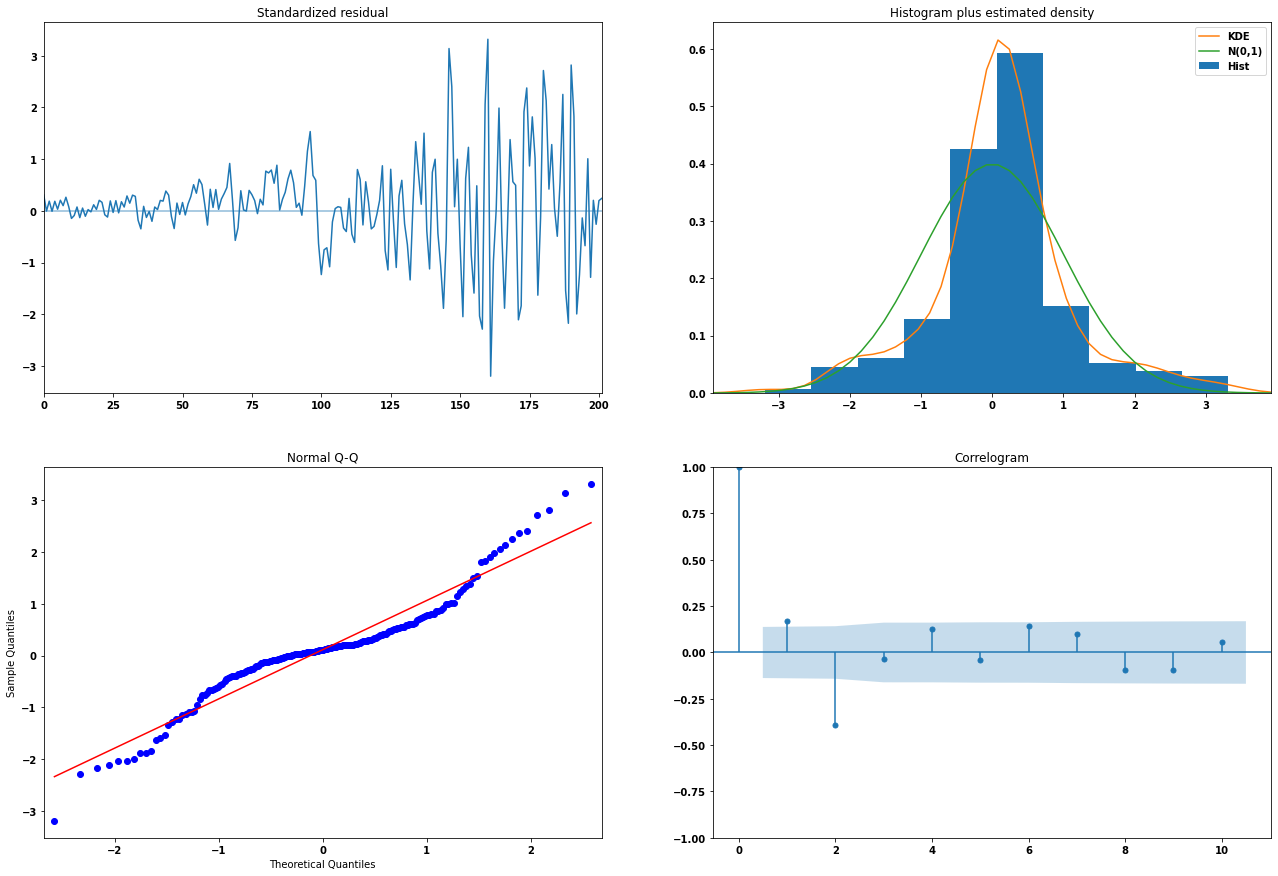

In [75]:
r4_autoarima.plot_diagnostics(figsize=(22,15))

In [76]:
#predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
#print predictions_ARIMA_diff.head()

In [77]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

## Region 5 forecasting

In [78]:
r5_preds = r5_autoarima.predict(n_periods=r5_test.shape[0], return_conf_int=True)

In [79]:
r5_preds

(array([  -78.40657223,  1000.01440491,   208.2704067 ,   228.60731506,
         -980.44708174, -1558.97952172, -1708.18209834, -1592.12467134,
        -1966.9025399 , -1058.14028137, -1958.54664842, -2870.84238175,
        -2680.2824749 , -1264.84784645,  -966.30995327,  -419.60632277,
         -334.99665437,  -947.22040718, -1545.08697249, -1680.5845579 ,
        -1692.71868668,  -669.63826559, -1477.51462278, -2411.65708426,
        -1887.40179563, -1021.2993815 , -1270.30684324,  -781.92724355,
          216.61718321,  -168.61933472, -1006.062914  , -1607.54012609,
        -1219.77345535,   -65.9224835 ,   114.34341215,  -550.963204  ,
         -508.054909  ,  -499.67677523,  -507.08050579,  -372.86408309,
          237.79358275,   248.75305899,    -3.37827139,  -257.8923152 ,
          -31.18703275,   173.78056261,   499.23890634,   488.40014603,
          410.27272662,    70.08631928,    47.25309935]),
 array([[ -3253.17083013,   3096.35768567],
        [ -4607.8023054 ,   6607.8

In [80]:
r5_forecastdf = pd.DataFrame(r5_preds[0], index=r5_test.index, columns=['prediction'])

In [81]:
r5_forecastdf.shape[0]

51

In [82]:
r5_forecastdf

,prediction
time,
2014-02-01,-78.406572
2014-03-01,1000.014405
2014-04-01,208.270407
2014-05-01,228.607315
2014-06-01,-980.447082
2014-07-01,-1558.979522
2014-08-01,-1708.182098
2014-09-01,-1592.124671
2014-10-01,-1966.902540


<AxesSubplot:xlabel='time'>

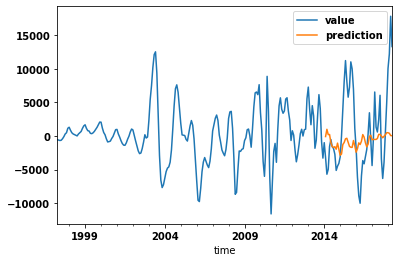

In [83]:
pd.concat([r5_roll_diff['value'], r5_forecastdf], axis=1).plot()

In [84]:
periods = r5_forecastdf.shape[0] + 36
periods

87

In [85]:
r5_future_forecast = r5_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [86]:
#forecast into investment horizon of 3 years
r5_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [87]:
r5_forecast_range

DatetimeIndex(['2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
               '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
      

In [88]:
r5_future_forecast

(array([  -78.40657223,  1000.01440491,   208.2704067 ,   228.60731506,
         -980.44708174, -1558.97952172, -1708.18209834, -1592.12467134,
        -1966.9025399 , -1058.14028137, -1958.54664842, -2870.84238175,
        -2680.2824749 , -1264.84784645,  -966.30995327,  -419.60632277,
         -334.99665437,  -947.22040718, -1545.08697249, -1680.5845579 ,
        -1692.71868668,  -669.63826559, -1477.51462278, -2411.65708426,
        -1887.40179563, -1021.2993815 , -1270.30684324,  -781.92724355,
          216.61718321,  -168.61933472, -1006.062914  , -1607.54012609,
        -1219.77345535,   -65.9224835 ,   114.34341215,  -550.963204  ,
         -508.054909  ,  -499.67677523,  -507.08050579,  -372.86408309,
          237.79358275,   248.75305899,    -3.37827139,  -257.8923152 ,
          -31.18703275,   173.78056261,   499.23890634,   488.40014603,
          410.27272662,    70.08631928,    47.25309935,   -48.14951119,
           71.06573419,   225.61078183,   322.94481533,   312.74

In [89]:
r5_future_forecastdf = pd.DataFrame(r5_future_forecast[0], index=r5_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

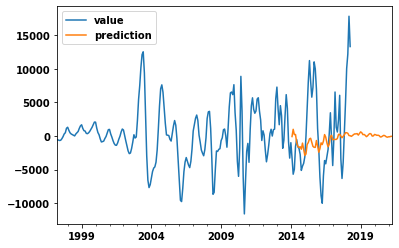

In [90]:
pd.concat([r5_roll_diff['value'], r5_future_forecastdf], axis=1).plot()

In [91]:
lower = pd.Series(r5_future_forecast[1][:,0], index=r5_forecast_range)
upper = pd.Series(r5_future_forecast[1][:,1], index=r5_forecast_range)

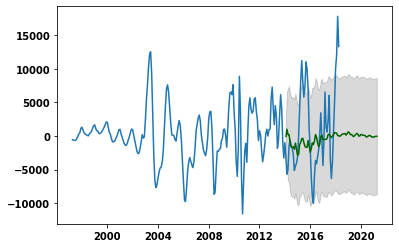

In [92]:
plt.plot(r5_roll_diff['value'])
plt.plot(r5_future_forecastdf, color='darkgreen')
plt.fill_between(r5_forecast_range,
                lower,
                upper,
                color='k', alpha=.15)

## Region 4 Forecasting

In [93]:
r4_preds = r4_autoarima.predict(n_periods=r4_test.shape[0], return_conf_int=True)

In [94]:
r4_preds

(array([ -8334.6433475 ,  -7023.39438143,  -8802.20852866, -10995.19955686,
        -11026.89359538,  -9240.29895319,  -6750.97214283,  -4575.25519122,
         -5057.73317295,  -7901.48650075,  -7852.31028427,  -5254.23872407,
         -5681.9623219 ,  -7603.48938139,  -7366.84753471,  -6900.60350293,
         -6249.28317923,  -4648.50229873,  -3711.29370057,  -1974.71293947,
         -1584.91894281,  -2280.37027452,  -1383.60226649,     45.94740987,
         -1204.43538646,  -2942.13489083,  -2109.68429493,   -973.10637959,
          -531.76398545,   -157.669339  ,   -482.12617853,   -167.86646703,
           269.20678103,    887.93075964,   1454.60032838,   1408.04503006,
           753.87129967,    344.73224708,    798.40823971,   1363.88202386,
          1406.2165176 ,   1046.91689613,    482.11893153,     32.63878625,
           170.76244015,    836.3037497 ,    867.91349313,    298.85074293,
           343.40559046,    731.39436008,    713.56424337]),
 array([[-12044.81007975,  

In [95]:
r4_forecastdf = pd.DataFrame(r4_preds[0], index=r4_test.index, columns=['prediction'])
r4_forecastdf.head(10)

,prediction
time,
2014-02-01,-8334.643347
2014-03-01,-7023.394381
2014-04-01,-8802.208529
2014-05-01,-10995.199557
2014-06-01,-11026.893595
2014-07-01,-9240.298953
2014-08-01,-6750.972143
2014-09-01,-4575.255191
2014-10-01,-5057.733173


<AxesSubplot:xlabel='time'>

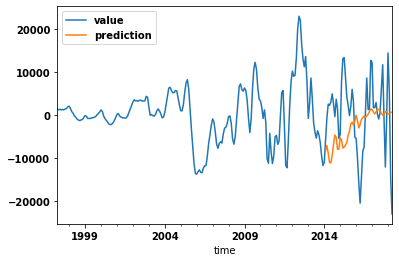

In [96]:
pd.concat([r4_roll_diff['value'], r4_forecastdf], axis=1).plot()

In [97]:
periods = r4_forecastdf.shape[0] + 36
periods

87

In [98]:
r4_future_forecast = r4_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [99]:
#forecast into investment horizon of 3 years
r4_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [100]:
r4_future_forecastdf = pd.DataFrame(r4_future_forecast[0], index=r4_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

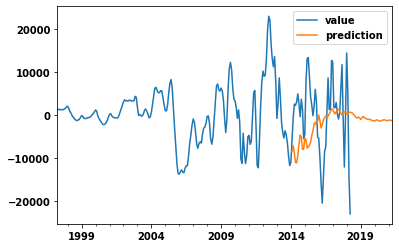

In [101]:
pd.concat([r4_roll_diff['value'], r4_future_forecastdf], axis=1).plot()

In [102]:
lower = pd.Series(r4_future_forecast[1][:,0], index=r4_forecast_range)
upper = pd.Series(r4_future_forecast[1][:,1], index=r4_forecast_range)

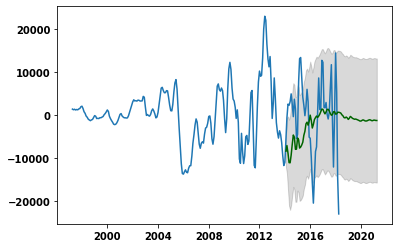

In [103]:
plt.plot(r4_roll_diff['value'])
plt.plot(r4_future_forecastdf, color='darkgreen')
plt.fill_between(r5_forecast_range,
                lower,
                upper,
                color='k', alpha=.15)

## Region 3 Forecasting

In [104]:
r3_preds = r3_autoarima.predict(n_periods=r3_test.shape[0], return_conf_int=True)

In [105]:
r3_forecastdf = pd.DataFrame(r3_preds[0], index=r3_test.index, columns=['prediction'])
r3_forecastdf.head(10)

,prediction
time,
2014-02-01,3796.938965
2014-03-01,-144.346063
2014-04-01,-916.732325
2014-05-01,-644.328614
2014-06-01,-3537.938157
2014-07-01,-6440.323233
2014-08-01,-4490.925066
2014-09-01,-3410.488859
2014-10-01,-2256.938939


<AxesSubplot:xlabel='time'>

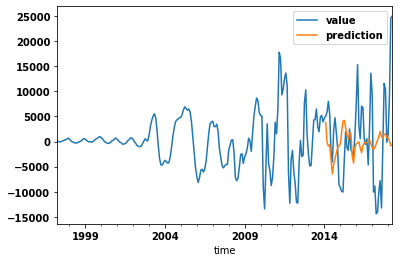

In [106]:
pd.concat([r3_roll_diff['value'], r3_forecastdf], axis=1).plot()

In [107]:
periods = r3_forecastdf.shape[0] + 36
periods

87

In [108]:
r3_future_forecast = r3_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [109]:
#forecast into investment horizon of 3 years
r3_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [110]:
r3_future_forecastdf = pd.DataFrame(r3_future_forecast[0], index=r3_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

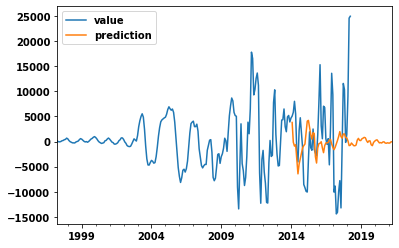

In [111]:
r3_combo = pd.concat([r3_roll_diff['value'], r3_future_forecastdf], axis=1)
r3_combo.plot()

In [112]:
lower = pd.Series(r3_future_forecast[1][:,0], index=r3_forecast_range)
upper = pd.Series(r3_future_forecast[1][:,1], index=r3_forecast_range)

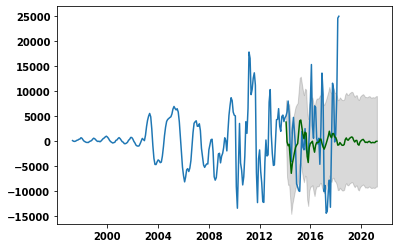

In [113]:
plt.plot(r3_roll_diff['value'])
plt.plot(r3_future_forecastdf, color='darkgreen')
plt.fill_between(r3_forecast_range,
                lower,
                upper,
                color='k', alpha=.15)

## Region 2 Forecasting

In [115]:
r2_preds = r2_autoarima.predict(n_periods=r2_test.shape[0], return_conf_int=True)

In [116]:
r2_forecastdf = pd.DataFrame(r2_preds[0], index=r2_test.index, columns=['prediction'])
r2_forecastdf.head(10)

,prediction
time,
2014-02-01,-1620.385151
2014-03-01,-1738.449024
2014-04-01,-2357.751164
2014-05-01,-2555.573421
2014-06-01,-2347.909730
2014-07-01,-1985.487904
2014-08-01,-1297.094152
2014-09-01,-881.788715
2014-10-01,-482.074880


<AxesSubplot:xlabel='time'>

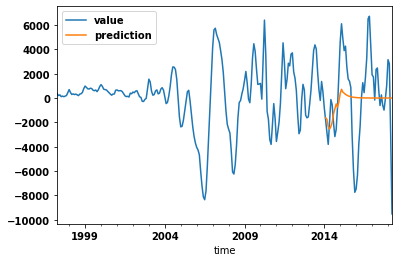

In [118]:
pd.concat([r2_roll_diff['value'], r2_forecastdf], axis=1).plot()

In [124]:
periods = r2_forecastdf.shape[0] + 36
periods

87

In [125]:
r2_future_forecast = r2_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [126]:
#forecast into investment horizon of 3 years
r2_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [128]:
r2_future_forecastdf = pd.DataFrame(r2_future_forecast[0], index=r2_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

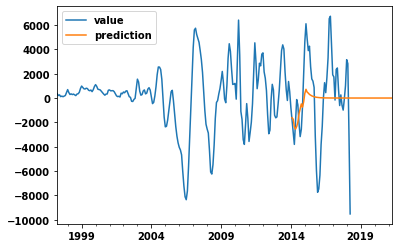

In [129]:
r2_combo = pd.concat([r2_roll_diff['value'], r2_future_forecastdf], axis=1)
r2_combo.plot()

## Region 1 Forecasting

In [130]:
r1_preds = r1_autoarima.predict(n_periods=r1_test.shape[0], return_conf_int=True)

In [131]:
r1_forecastdf = pd.DataFrame(r1_preds[0], index=r1_test.index, columns=['prediction'])
r1_forecastdf.head(10)

,prediction
time,
2014-02-01,-571.942982
2014-03-01,-181.151475
2014-04-01,-1380.444343
2014-05-01,-1372.292521
2014-06-01,-818.782239
2014-07-01,-1202.554621
2014-08-01,-1380.713156
2014-09-01,-672.890019
2014-10-01,456.048517


<AxesSubplot:xlabel='time'>

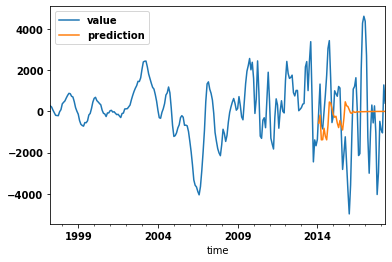

In [132]:
pd.concat([r1_roll_diff['value'], r1_forecastdf], axis=1).plot()

In [134]:
periods = r1_forecastdf.shape[0] + 36
periods

87

In [135]:
r1_future_forecast = r1_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [136]:
#forecast into investment horizon of 3 years
r1_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [137]:
r1_future_forecastdf = pd.DataFrame(r1_future_forecast[0], index=r1_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

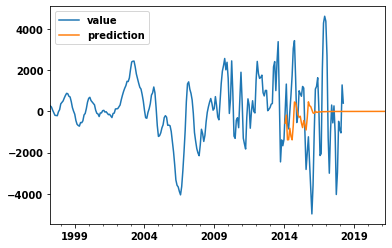

In [138]:
r1_combo = pd.concat([r1_roll_diff['value'], r1_future_forecastdf], axis=1)
r1_combo.plot()

# Step 6: Interpreting Results

## Region 5: undo de-trend transformations to interpret forecasts

In [139]:
r5_forecastdf.head(10)

,prediction
time,
2014-02-01,-78.406572
2014-03-01,1000.014405
2014-04-01,208.270407
2014-05-01,228.607315
2014-06-01,-980.447082
2014-07-01,-1558.979522
2014-08-01,-1708.182098
2014-09-01,-1592.124671
2014-10-01,-1966.902540


## Region 4: undo de-trend transformations to interpret forecasts

## Region 3: undo de-trend transformations to interpret forecasts

## Region 2: undo de-trend transformations to interpret forecasts

## Region 1: undo de-trend transformations to interpret forecasts